# Assignment 6

### Problem 9.16

In [1]:
suppressPackageStartupMessages(library(alr4))
suppressMessages(attach(florida))
florida[47:53,]

,Gore,Bush,Buchanan
OKEECHOBEE,4588,5058,43
ORANGE,140115,134476,446
OSCEOLA,28177,26216,145
PALM BEACH,268945,152846,3407
PASCO,69550,68581,570
PINELLAS,199660,184312,1010
POLK,74977,90101,538


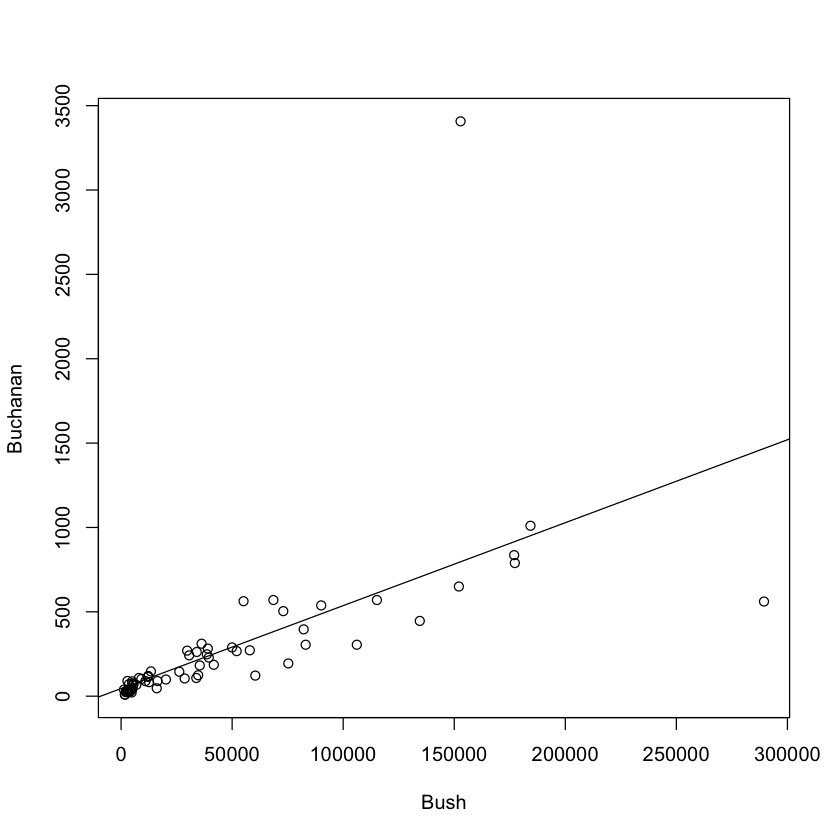

In [2]:
reg <- lm(Buchanan~Bush)
plot(Buchanan~Bush)
abline(reg)

In [3]:
summary(reg)
e50 <- round(abs(resid(reg)),4)[50]


Call:
lm(formula = Buchanan ~ Bush)

Residuals:
    Min      1Q  Median      3Q     Max 
-907.50  -46.10  -29.19   12.26 2610.19 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.529e+01  5.448e+01   0.831    0.409    
Bush        4.917e-03  7.644e-04   6.432 1.73e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 353.9 on 65 degrees of freedom
Multiple R-squared:  0.3889,	Adjusted R-squared:  0.3795 
F-statistic: 41.37 on 1 and 65 DF,  p-value: 1.727e-08


In [4]:
infl <- influence(reg)
h50 <- infl$hat[50]
h50

50 
0.07085197

In [5]:
r50 <- e50/(353.9*sqrt(1-h50))
r50

50 
7.651552

In [6]:
updated_florida <- florida[-50]
updated_florida[48:53,]

,Gore,Bush,Buchanan
ORANGE,140115,134476,446
OSCEOLA,28177,26216,145
PALM BEACH,268945,152846,3407
PASCO,69550,68581,570
PINELLAS,199660,184312,1010
POLK,74977,90101,538


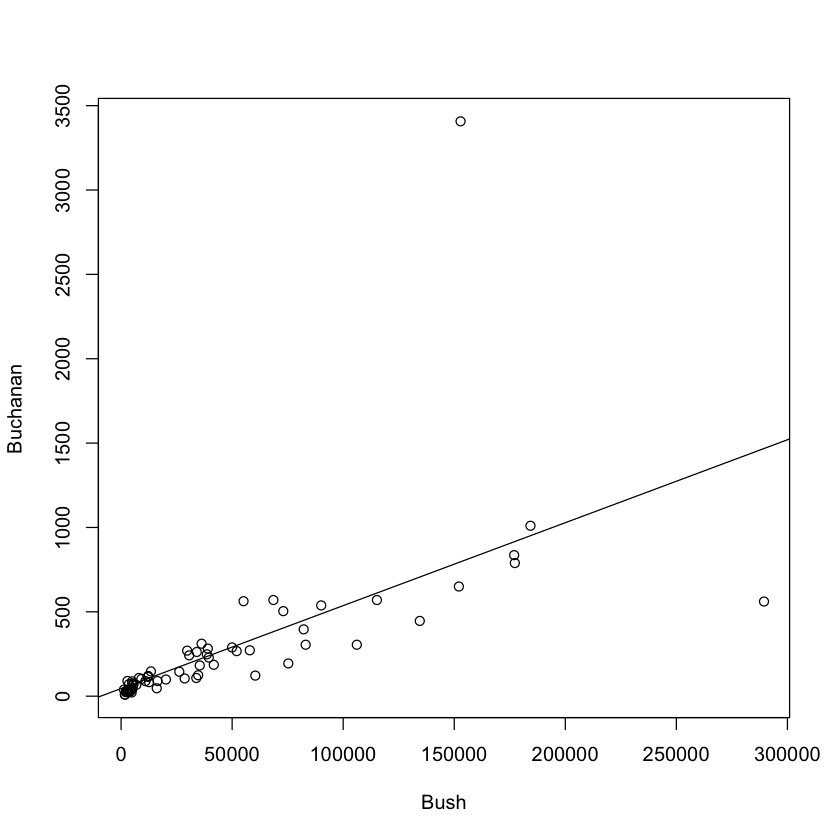

In [7]:
reg2 <- lm(Buchanan~Bush, data=updated_florida)
plot(Buchanan~Bush, data=updated_florida)
abline(reg2)

Looks like the outlier was successfully removed and regression line recalculated.

In [8]:
summary(reg2)


Call:
lm(formula = Buchanan ~ Bush, data = updated_florida)

Residuals:
    Min      1Q  Median      3Q     Max 
-907.50  -46.10  -29.19   12.26 2610.19 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.529e+01  5.448e+01   0.831    0.409    
Bush        4.917e-03  7.644e-04   6.432 1.73e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 353.9 on 65 degrees of freedom
Multiple R-squared:  0.3889,	Adjusted R-squared:  0.3795 
F-statistic: 41.37 on 1 and 65 DF,  p-value: 1.727e-08


$\beta_0 = 6.557 \times 10^1$

$\sigma_0^2 = 1.733 \times 10^1$

$\beta_1 = 3.482  \times 10^-3$

$\sigma_1^2 = 2.501  \times 10^-4 $

In [9]:
t50 <- e50/(112.5*sqrt(1-h50))
t50

50 
24.07008

In [10]:
fitted_value <- 6.557e+01 + 3.482e-03 * 152846
fitted_value

[1] 597.7798

In [11]:
rstandard(reg)[50]

50 
7.651072

In [12]:
rstudent(reg)[50]

50 
24.08014

In [13]:
dim(florida)

[1] 67  3

In [14]:
pval <- 2*(1-pt(24.0801444,65))*67
pval

[1] 0

**Testing if another value is an outlier**

In [15]:
florida[13,]

,Gore,Bush,Buchanan
DADE,328702,289456,561


In [16]:
print(rstandard(reg)[13])
print(rstudent(reg)[13])

      13 
-3.05918 
       13 
-3.280922 


In [17]:
pval2 <- 2*(1-pt(3.280922,65))
pval2

[1] 0.001665973

### Problem 10.4

In [18]:
suppressMessages(attach(BGSboys))
names(BGSboys)

[1] "WT2"   "HT2"   "WT9"   "HT9"   "LG9"   "ST9"   "WT18"  "HT18"  "LG18" 
[10] "ST18"  "BMI18" "Soma"

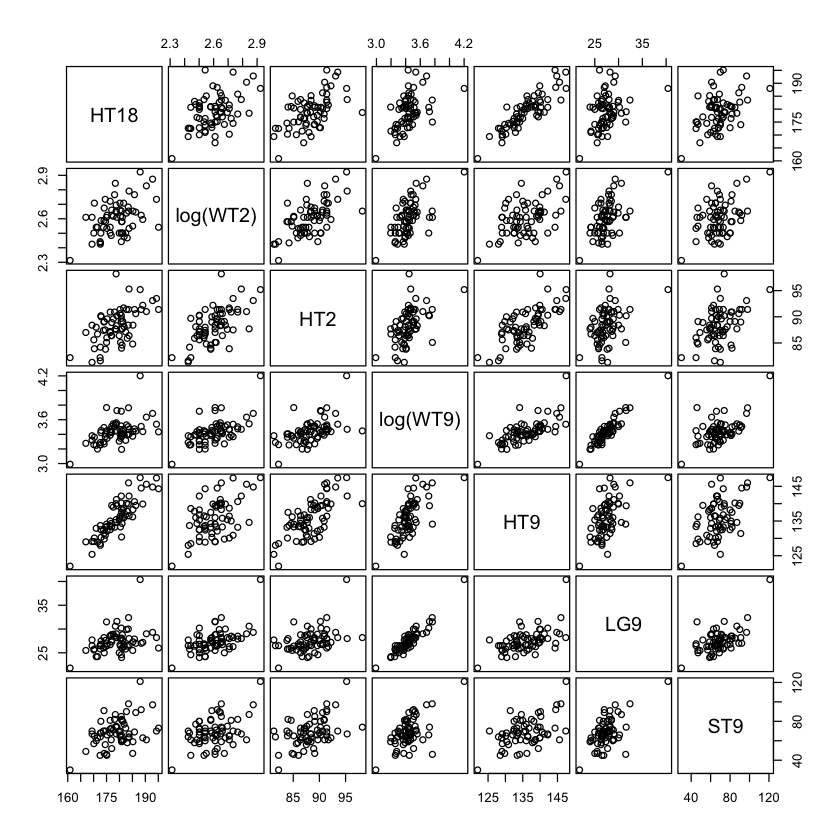

In [19]:
f <- HT18~log(WT2)+HT2+log(WT9)+HT9+LG9+ST9
l <- lm(f)
pairs(f,data=BGSboys,gap=0.4,cex.labels=1.5)

Comments: no strong relationships between HT18 and its regressors, but there is a moderate relationship with HT9. A couple regressors have relationships with each other, such as log(WT9) and LG9.

In [20]:
step(l)

Start:  AIC=152.47
HT18 ~ log(WT2) + HT2 + log(WT9) + HT9 + LG9 + ST9

           Df Sum of Sq     RSS    AIC
- log(WT9)  1      0.30  538.25 150.51
- ST9       1     12.74  550.69 152.02
- LG9       1     15.82  553.76 152.39
<none>                   537.95 152.47
- log(WT2)  1     22.56  560.50 153.19
- HT2       1     26.51  564.45 153.65
- HT9       1    879.31 1417.25 214.41

Step:  AIC=150.51
HT18 ~ log(WT2) + HT2 + HT9 + LG9 + ST9

           Df Sum of Sq     RSS    AIC
- ST9       1     13.30  551.55 150.12
<none>                   538.25 150.51
- log(WT2)  1     22.25  560.50 151.19
- HT2       1     26.40  564.65 151.67
- LG9       1     97.12  635.37 159.46
- HT9       1   1204.33 1742.58 226.05

Step:  AIC=150.12
HT18 ~ log(WT2) + HT2 + HT9 + LG9

           Df Sum of Sq     RSS    AIC
<none>                   551.55 150.12
- HT2       1     21.47  573.02 150.64
- log(WT2)  1     22.99  574.55 150.82
- LG9       1     84.04  635.59 157.48
- HT9       1   1239.55 1791.10 225


Call:
lm(formula = HT18 ~ log(WT2) + HT2 + HT9 + LG9)

Coefficients:
(Intercept)     log(WT2)          HT2          HT9          LG9  
    30.8241       7.1301      -0.2690       1.2509      -0.6048  


In [21]:
step(l, k = log(66))

Start:  AIC=167.8
HT18 ~ log(WT2) + HT2 + log(WT9) + HT9 + LG9 + ST9

           Df Sum of Sq     RSS    AIC
- log(WT9)  1      0.30  538.25 163.65
- ST9       1     12.74  550.69 165.16
- LG9       1     15.82  553.76 165.53
- log(WT2)  1     22.56  560.50 166.32
- HT2       1     26.51  564.45 166.79
<none>                   537.95 167.80
- HT9       1    879.31 1417.25 227.55

Step:  AIC=163.65
HT18 ~ log(WT2) + HT2 + HT9 + LG9 + ST9

           Df Sum of Sq     RSS    AIC
- ST9       1     13.30  551.55 161.07
- log(WT2)  1     22.25  560.50 162.13
- HT2       1     26.40  564.65 162.62
<none>                   538.25 163.65
- LG9       1     97.12  635.37 170.41
- HT9       1   1204.33 1742.58 237.00

Step:  AIC=161.07
HT18 ~ log(WT2) + HT2 + HT9 + LG9

           Df Sum of Sq     RSS    AIC
- HT2       1     21.47  573.02 159.40
- log(WT2)  1     22.99  574.55 159.58
<none>                   551.55 161.07
- LG9       1     84.04  635.59 166.24
- HT9       1   1239.55 1791.10 234.


Call:
lm(formula = HT18 ~ HT9 + LG9)

Coefficients:
(Intercept)          HT9          LG9  
    31.3192       1.1853      -0.4876  


In [22]:
rega = lm(HT18 ~ log(WT2) + HT2 + HT9 + LG9)
regb = lm(HT18 ~ HT9 + LG9)
summary(rega)
summary(regb)


Call:
lm(formula = HT18 ~ log(WT2) + HT2 + HT9 + LG9)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3742 -1.5409  0.3665  1.8497  7.1272 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  30.8241    11.0864   2.780  0.00721 ** 
log(WT2)      7.1301     4.4710   1.595  0.11594    
HT2          -0.2690     0.1745  -1.541  0.12847    
HT9           1.2509     0.1068  11.709  < 2e-16 ***
LG9          -0.6048     0.1984  -3.049  0.00340 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.007 on 61 degrees of freedom
Multiple R-squared:  0.8002,	Adjusted R-squared:  0.7871 
F-statistic: 61.09 on 4 and 61 DF,  p-value: < 2.2e-16



Call:
lm(formula = HT18 ~ HT9 + LG9)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.1632 -1.9599  0.4714  2.0057  6.6190 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 31.31920    9.63309   3.251  0.00185 ** 
HT9          1.18531    0.08475  13.986  < 2e-16 ***
LG9         -0.48762    0.18401  -2.650  0.01016 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.041 on 63 degrees of freedom
Multiple R-squared:  0.7889,	Adjusted R-squared:  0.7822 
F-statistic: 117.7 on 2 and 63 DF,  p-value: < 2.2e-16


In [23]:
influence.measures(regb)

Influence measures of
	 lm(formula = HT18 ~ HT9 + LG9) :

      dfb.1_  dfb.HT9   dfb.LG9    dffit cov.r   cook.d    hat inf
1   3.49e-02  0.03101 -0.143734 -0.18090 1.087 1.10e-02 0.0588    
2  -4.45e-01  0.57871 -0.451677  0.64837 0.983 1.34e-01 0.1024    
3  -2.22e-02  0.05719 -0.076921  0.16699 1.001 9.24e-03 0.0195    
4   4.95e-03 -0.00794  0.010583  0.02835 1.066 2.72e-04 0.0178    
5  -4.16e-02  0.02275  0.024981 -0.06136 1.100 1.27e-03 0.0492    
6  -3.95e-03  0.02335 -0.038639  0.10197 1.039 3.49e-03 0.0177    
7   1.11e-01 -0.10552  0.033847  0.13346 1.082 6.00e-03 0.0472    
8   3.35e-02 -0.05230  0.051259 -0.07965 1.075 2.14e-03 0.0330    
9  -2.79e-02  0.02986 -0.018305 -0.05571 1.065 1.05e-03 0.0213    
10 -5.06e-02  0.04930 -0.013862  0.05895 1.124 1.18e-03 0.0690    
11 -4.69e-02  0.02736  0.021596 -0.09005 1.056 2.73e-03 0.0229    
12 -6.98e-02  0.00468  0.107969 -0.23503 0.957 1.80e-02 0.0224    
13 -6.31e-02  0.08136 -0.055060  0.15810 1.013 8.31e-03 0.0208    
14  

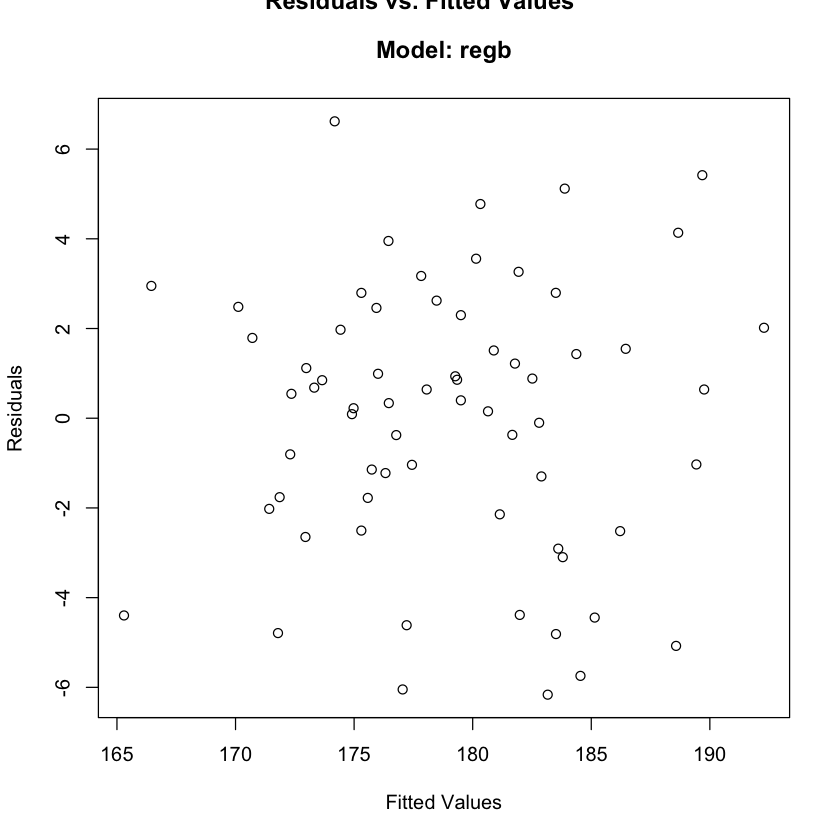

In [29]:
plot(resid(regb)~fitted(regb),xlab="Fitted Values",ylab="Residuals", main="Model: regb")
title("Residuals vs. Fitted Values", outer=TRUE)

This is a null plot so it appears that the mean function is appropriate, that the estimation is unbiased.

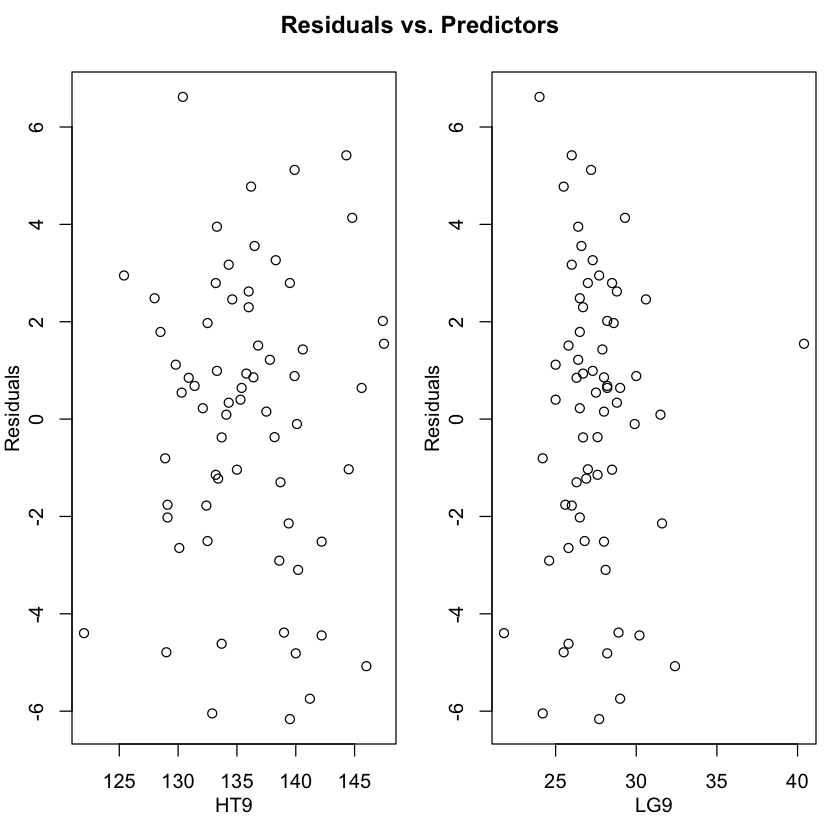

In [27]:
par(mfrow=c(1,2), mar=c(4,3,1,1),mgp=c(2,1,0), oma=c(0,0,2,0))
plot(resid(regb)~HT9,ylab="Residuals")
plot(resid(regb)~LG9,ylab="Residuals")
title("Residuals vs. Predictors", outer=TRUE)

No separate groups in either plot, so no need to do an F test. Is a null plot, so the constant variance assumption appears to be correct

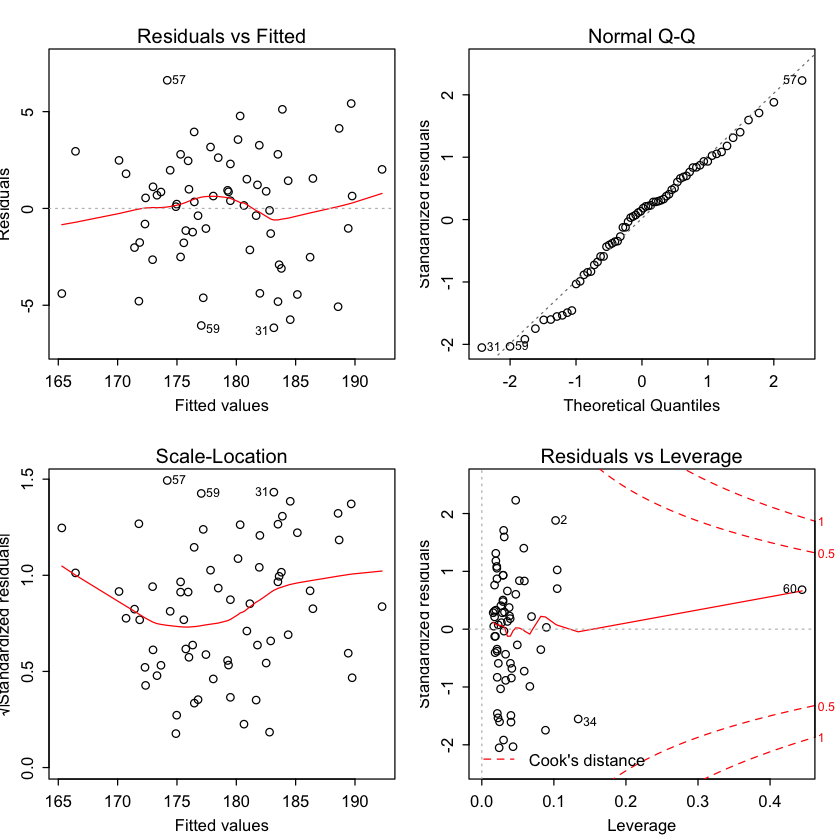

In [24]:
par(mfrow=c(2,2),mex=0.6)
plot(regb)

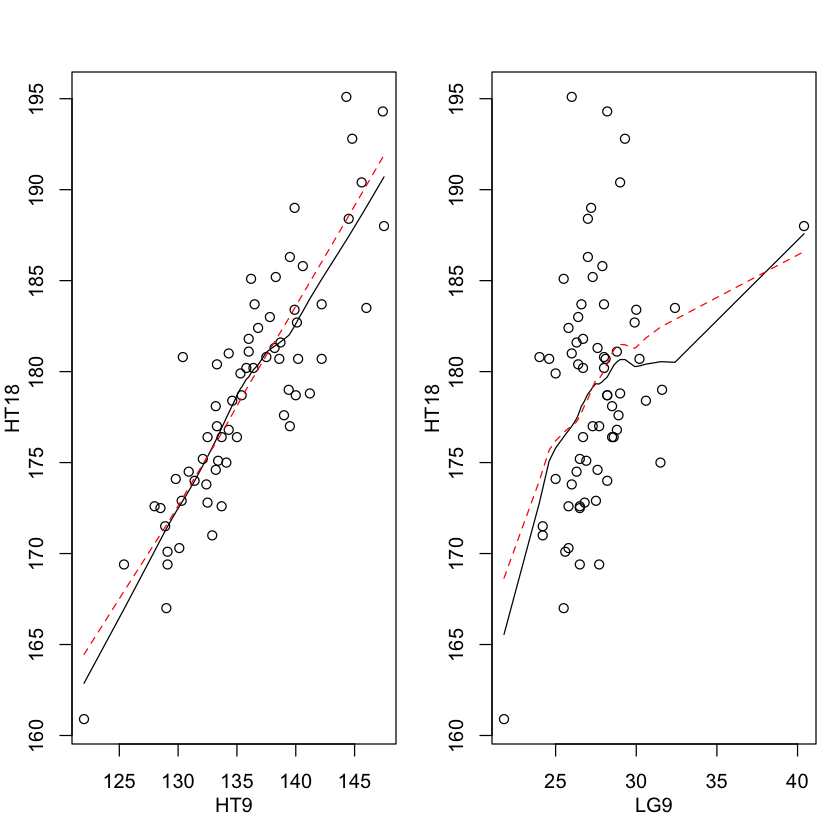

In [34]:
par(mfrow=c(1,2), mar=c(4,3,1,1), mgp=c(2,1,0), oma=c(0,0,2,0))
plot(HT18~HT9)
lines(lowess(HT18~HT9,f=2/3))
lines(lowess(fitted(regb)~HT9,f=2/3),col="red",lty=2)
plot(HT18~LG9)
lines(lowess(HT18~LG9,f=2/3))
lines(lowess(fitted(regb)~LG9,f=2/3),col="red",lty=2)

For the first plot the two lowess estimates seem not to differ much. But for the second plot, they do differ, which indicates a possible influential point in the data given. 

**Recall the influential points in regb:**

<pre>
32  2.76e-03 -0.00603  0.008746  0.00971 1.152 3.19e-05 0.0896   *
49 -2.05e-01  0.21908 -0.102060  0.23853 1.145 1.91e-02 0.1046   *
60 -1.56e-01 -0.10524  0.545327  0.60781 1.847 1.24e-01 0.4444   *
</pre>

There are indeed three influential observations, which could account for the difference in these lowess estimates.